# Cycloidal "Pendulum"

Last revised: Sep 29, 2021 by Heiko Hergert [hergert@frib.msu.edu]<br>
Based in part on work by Dick Furnstahl [furnstahl.1@osu.edu].

## Introduction

We previously discussed the problem that led to the invention of the calculus of variations, the **brachistochrone**. We found that the trajectory of fastest descent between two points in the gravitational field that do not lie directly above one another is the cycloid, which we can parameterize by

$\begin{align}
  x(\phi) &= R\left(\phi + \sin{\phi}\right)\,,\\
  y(\phi) &= R\left(1 - \cos{\phi}\right)\,,
\end{align}$

with an increase in $y$ corresponding to downward movement and $\phi$ being time-dependent.

Here, we are going to show another interesting property of this curve: On a frictionless surface shaped like a cycloid, masses released from **any** starting point will reach the minimum of the curve **at the same time**. Because of this property, the curve is also referred to as a **tautochrone** or **isochrone** (from Greek *tauto-*, "same", or *iso-*, "equal").

Huygens constructed a cycloidal pendulum, which suspends the bob on a string between cycloidal arcs, so the string would be constrained to the shape of a cycloid. This ensures that the period of the pendulum will be identical regardless of the amplitude of the pendulum motion, which is **not true** for a regular pendulum. (The period is only independent of the amplitude in the small-amplitude limit.)

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import animation 

# To draw the "track": see https://matplotlib.org/api/patches_api.html
import matplotlib.patches as patches  

### Trajectory Definition

Here we define the trajectories for masses moving in cycloidal bowl (using the given parameterization).

In [3]:
def cycloid(phi):
    """Parameterized cycloid.  
       (x,y) = (0,0) when phi = 0 and (x,y) = (pi,2) when phi = pi.
       Note the changed sign in the y component: we will have y increase 
       downward, in the direction of gravity, which facilitates the 
       visualization.
    """
    x = phi + np.sin(phi)
    y = 1 -np.cos(phi)
    return np.array([x, y])


### Animation

In [4]:
def animate_cycloid(nframe, empty=False):
    """
    Draw a new frame every time that has the ramp and the balls.
    """
    t = nframe / float(nframes)
    
    # prepare a clean and image-filling canvas for each frame
    fig = plt.gcf()
    fig.clf()
    ax_canvas = plt.gca()
    ax_canvas.set_position((0, 0, 1, 1))
    ax_canvas.set_xlim(0, width)
    ax_canvas.set_ylim(0, height)
    ax_canvas.axis('off')
    
    # draw the ramp for the cycloid
    x0, y0 = width//2, 18   # //2 mean round down to an integer
    h = 192
    npoints = 400
    points = []
    for i in range(npoints):
        phi = i / (npoints - 1.0) * 2 * np.pi - np.pi  # -pi < phi < pi
        x, y = h/2. * cycloid(phi) + np.array([x0, y0])
        points.append([x, y])
    
    # Draw the gray ramp and dark line on top (called rampline)
    rampline = patches.Polygon(points, closed=False, facecolor='none',
                       edgecolor='#b0b0b0', linewidth=2, capstyle='butt')
    
    # Add the lower right, lower left, and upper left points to make a connected path.
    points += [[x0+h*np.pi/2, y0], [x0-h*np.pi/2, y0], [x0-h*np.pi/2, y0+h]]

    # Now connect the points in a closed gray shape, with no edge marking.
    ramp = patches.Polygon(points, closed=True, facecolor='#f0f0f0', 
                           edgecolor='none')
    ax_canvas.add_patch(ramp)
    ax_canvas.add_patch(rampline)
    
    # parameters for the cycloid
    R = 1.
    g = 9.8
    
    for b in balls:
        # We need to translate units...
        phi_harm = b['a'] * -np.cos(t * 2 * np.pi)
        phi_wheel = 2 * np.arcsin(phi_harm)
        x, y = h/2. * cycloid(phi_wheel) + np.array([x0, y0])
        ax_canvas.add_patch(patches.Circle((x, y), radius=10.,
                            facecolor=b['color'], edgecolor='black'))

        # normalized tangent vector
        tangent = h/2. * np.array([1 + np.cos(phi_wheel), np.sin(phi_wheel)])
        tnorm = tangent / np.sqrt(tangent[0]**2 + tangent[1]**2)

        # in harmonic motion, acceleration is proportional to -position
        # we'll scale up the acceleration vector for visualization purposes
        acc_along_line = 20*g/(4.*R) * -phi_harm * tnorm
        ax_canvas.arrow(x, y, acc_along_line[0], acc_along_line[1],
                        head_width=6, head_length=6, linewidth=2, 
                        fc='#ff001b', ec='#ff001b')


<IPython.core.display.Javascript object>


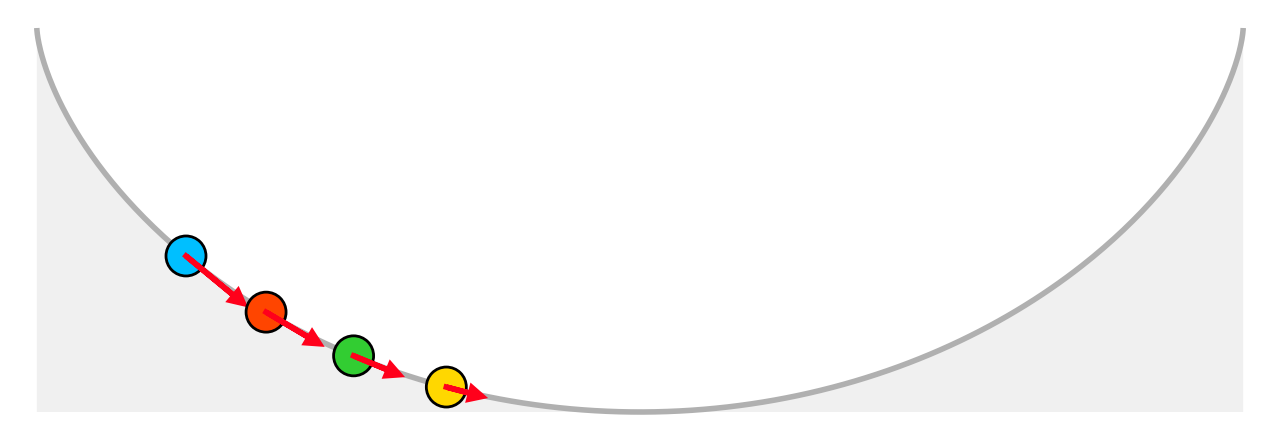

In [5]:
# Settings
# gif_filename = 'cycloidal_pendulum'  # filename for gif
width, height = 640, 224  # dimensions of each frame
nframes = 50  # number of frames
fps=24  # frames per second

# List of balls, with dict for each telling where it starts and what color
balls = [
         {'a':1.0, 'color':'deepskyblue'},
         {'a':0.8, 'color':'orangered'},
         {'a':0.6, 'color':'limegreen'},
         {'a':0.4, 'color':'gold'}]


fig_cycloid = plt.figure(num=1, figsize=(width/100., height/100.))
anim_cycloid = animation.FuncAnimation(fig_cycloid, animate_cycloid, frames=nframes)

The red vectors (scaled up for visualization) are indicating the acceleration of the balls tangential to the trajectory. 